In [1]:
# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

# Other Libraries
from imblearn.datasets import fetch_datasets
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn import model_selection
import warnings
warnings.filterwarnings("ignore")

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import tensorflow as ts

Using TensorFlow backend.


# Preparing Data

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

In [4]:
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
120036,75688.0,-0.863590,1.196813,0.809566,-0.143447,-0.174497,-0.574433,0.275462,0.446402,-0.102914,...,-0.299118,-0.841071,-0.013508,-0.116623,-0.177824,0.060970,0.044363,-0.147051,8.94,0
94218,64785.0,-8.744415,-3.420468,-4.850575,6.606846,-2.800546,0.105512,-3.269801,0.940378,-2.558691,...,0.102913,0.311626,-4.129195,0.034639,-1.133631,0.272265,1.841307,-1.796363,720.38,1
81894,59149.0,-2.043387,0.209882,-2.057269,-0.308584,-6.945621,2.362735,4.723844,0.010156,-2.064412,...,-0.498607,-0.313667,0.380530,0.522567,-0.378346,1.108289,0.256636,-0.528236,1231.00,0
229730,146026.0,1.894036,1.905806,-3.515730,4.508913,2.044466,-1.420468,1.057480,-0.281157,-1.832604,...,-0.144713,-0.310108,-0.101530,-0.414960,0.376597,0.150778,-0.013712,0.048084,2.22,1
68320,52934.0,1.036639,0.407227,0.757706,3.161821,-0.568122,0.202181,-0.689804,0.411380,0.336769,...,-0.050108,0.123761,-0.132568,0.350231,0.507701,0.189621,0.061016,0.063141,0.76,1


In [5]:
new_df.shape

(984, 31)

# Feature Selection

In [6]:
corr_matrix = new_df.corr()

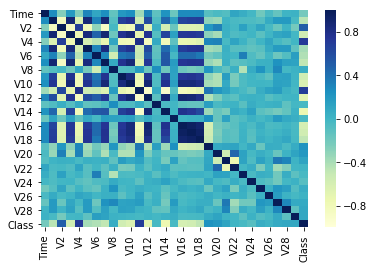

In [7]:
ax = sns.heatmap(corr_matrix,vmin=-1, vmax=1,cmap="YlGnBu")

In [8]:
corr_matrix['Class'].sort_values(ascending=False)

Class     1.000000
V4        0.711204
V11       0.690960
V2        0.494038
V19       0.236554
V20       0.199725
V21       0.119516
V28       0.096401
Amount    0.094566
V27       0.084840
V8        0.059604
V25       0.059484
V26       0.017359
V22       0.000230
V13      -0.024909
V23      -0.025916
V15      -0.030434
V24      -0.087906
Time     -0.210222
V5       -0.376404
V6       -0.421465
V1       -0.449729
V18      -0.472304
V7       -0.479960
V17      -0.558633
V9       -0.558925
V3       -0.565398
V16      -0.592254
V10      -0.629344
V12      -0.683446
V14      -0.751528
Name: Class, dtype: float64

In [9]:

droplist = ['V8', 'V13', 'V15', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25' , 'V26', 'V27', 'V28']
data = new_df.drop(droplist, axis = 1)

In [10]:
from sklearn.preprocessing import StandardScaler

col = ['Amount','Time']
sc =StandardScaler()
data[col] =sc.fit_transform(data[col])


# preparing present data

In [11]:
fraud_for_pre = fraud_df[:5]
non_fraud_for_pre = non_fraud_df[:5]
present_data = pd.concat([fraud_for_pre, non_fraud_for_pre])

In [12]:
present_data[col] = sc.fit_transform(present_data[col])

In [13]:
present_data = present_data.drop(droplist, axis = 1)

In [14]:
present_data_X = present_data.iloc[:, :-1]
present_data_y = present_data.iloc[:, -1]

In [15]:
X = data.drop(['Class'], axis=1)
y = data['Class']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Model Training

### Logistic Regression

In [17]:
# Logistic Regression
classifier_logistic = LogisticRegression()

In [18]:
# Train the model
classifier_logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [19]:
# Prediction of test data
classifier_logistic.predict(X_test)
# Accuracy of test data
classifier_logistic.score(X_test, y_test)

0.9441624365482234

### Random Forest

In [20]:
# Random Forest
classifier_RF = RandomForestClassifier()

In [21]:
# Train the model
classifier_RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [22]:
# Prediction of test data
classifier_RF.predict(X_test)
# Accuracy of test data
classifier_RF.score(X_test, y_test)

0.9289340101522843

### KNN

In [23]:
# K Nearest Neighbors
classifier_KNN = KNeighborsClassifier()

In [24]:
# Train the model
classifier_KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [25]:
# Prediction of test data
classifier_KNN.predict(X_test)
# Accuracy of test data
classifier_KNN.score(X_test, y_test)

0.9289340101522843

### Use 5-fold Cross Validation to get the accuracy for different models

In [26]:
model_names = ['Logistic Regression','KNN','Random Forest']
model_list = [classifier_logistic, classifier_KNN, classifier_RF]
count = 0

for classifier in model_list:
    cv_score = model_selection.cross_val_score(classifier, X_train, y_train, cv=5)
    # cprint(cv_score)
    print('Model accuracy of %s is: %.3f'%(model_names[count],cv_score.mean()))
    count += 1

Model accuracy of Logistic Regression is: 0.947
Model accuracy of KNN is: 0.940
Model accuracy of Random Forest is: 0.938


### NN

In [27]:
model_nn = Sequential()
model_nn.add(Dense(30, input_dim=18, activation='relu'))
model_nn.add(Dense(60, activation='relu'))
model_nn.add(Dropout(0.2))
model_nn.add(Dense(10, activation='relu'))
model_nn.add(Dense(1, activation='relu'))

model_nn.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model_nn.fit(X_train, y_train, epochs=500, batch_size=32)
scores_nn = model_nn.evaluate(X_test, y_test)
print('nn accuracy = ', scores_nn[1])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/500
787/787 [==============================] - 0s 332us/step - loss: 0.6408 - acc: 0.6150
Epoch 2/500
787/787 [==============================] - 0s 38us/step - loss: 0.2705 - acc: 0.6976
Epoch 3/500
787/787 [==============================] - 0s 39us/step - loss: 0.2066 - acc: 0.7370
Epoch 4/500
787/787 [==============================] - 0s 39us/step - loss: 0.1747 - acc: 0.7713
Epoch 5/500
787/787 [==============================] - 0s 38us/step - loss: 0.1667 - acc: 0.7789
Epoch 6/500
787/787 [==============================] - 0s 37us/step - loss: 0.1509 - acc: 0.8158
Epoch 7/500
787/787 [==============================] - 0s 35us/step - loss: 0.1249 - acc: 0.8361
Epoch 8/500
787/787 [==============================] - 0s 35us/step - loss: 0.1148 - 

787/787 [==============================] - 0s 33us/step - loss: 0.0115 - acc: 0.9924
Epoch 76/500
787/787 [==============================] - 0s 33us/step - loss: 0.0116 - acc: 0.9911
Epoch 77/500
787/787 [==============================] - 0s 34us/step - loss: 0.0119 - acc: 0.9911
Epoch 78/500
787/787 [==============================] - 0s 37us/step - loss: 0.0110 - acc: 0.9949
Epoch 79/500
787/787 [==============================] - 0s 34us/step - loss: 0.0110 - acc: 0.9949
Epoch 80/500
787/787 [==============================] - 0s 38us/step - loss: 0.0105 - acc: 0.9936
Epoch 81/500
787/787 [==============================] - 0s 36us/step - loss: 0.0102 - acc: 0.9936
Epoch 82/500
787/787 [==============================] - 0s 36us/step - loss: 0.0105 - acc: 0.9924
Epoch 83/500
787/787 [==============================] - 0s 35us/step - loss: 0.0099 - acc: 0.9936
Epoch 84/500
787/787 [==============================] - 0s 35us/step - loss: 0.0106 - acc: 0.9911
Epoch 85/500
787/787 [===========

787/787 [==============================] - 0s 36us/step - loss: 0.0065 - acc: 0.9936
Epoch 159/500
787/787 [==============================] - 0s 39us/step - loss: 0.0062 - acc: 0.9949
Epoch 160/500
787/787 [==============================] - 0s 39us/step - loss: 0.0064 - acc: 0.9949
Epoch 161/500
787/787 [==============================] - 0s 34us/step - loss: 0.0047 - acc: 0.9962
Epoch 162/500
787/787 [==============================] - 0s 32us/step - loss: 0.0057 - acc: 0.9949
Epoch 163/500
787/787 [==============================] - 0s 33us/step - loss: 0.0061 - acc: 0.9949
Epoch 164/500
787/787 [==============================] - 0s 35us/step - loss: 0.0057 - acc: 0.9949
Epoch 165/500
787/787 [==============================] - 0s 33us/step - loss: 0.0060 - acc: 0.9949
Epoch 166/500
787/787 [==============================] - 0s 33us/step - loss: 0.0047 - acc: 0.9949
Epoch 167/500
787/787 [==============================] - 0s 31us/step - loss: 0.0050 - acc: 0.9949
Epoch 168/500
787/787 [=

787/787 [==============================] - 0s 33us/step - loss: 0.0047 - acc: 0.9949
Epoch 241/500
787/787 [==============================] - 0s 34us/step - loss: 0.0042 - acc: 0.9962
Epoch 242/500
787/787 [==============================] - 0s 36us/step - loss: 0.0055 - acc: 0.9949
Epoch 243/500
787/787 [==============================] - 0s 37us/step - loss: 0.0053 - acc: 0.9936
Epoch 244/500
787/787 [==============================] - 0s 32us/step - loss: 0.0050 - acc: 0.9962
Epoch 245/500
787/787 [==============================] - 0s 35us/step - loss: 0.0044 - acc: 0.9962
Epoch 246/500
787/787 [==============================] - 0s 33us/step - loss: 0.0042 - acc: 0.9962
Epoch 247/500
787/787 [==============================] - 0s 32us/step - loss: 0.0041 - acc: 0.9962
Epoch 248/500
787/787 [==============================] - 0s 37us/step - loss: 0.0040 - acc: 0.9962
Epoch 249/500
787/787 [==============================] - 0s 34us/step - loss: 0.0042 - acc: 0.9962
Epoch 250/500
787/787 [=

787/787 [==============================] - 0s 34us/step - loss: 0.0039 - acc: 0.9962
Epoch 323/500
787/787 [==============================] - 0s 32us/step - loss: 0.0050 - acc: 0.9949
Epoch 324/500
787/787 [==============================] - 0s 36us/step - loss: 0.0039 - acc: 0.9962
Epoch 325/500
787/787 [==============================] - 0s 35us/step - loss: 0.0039 - acc: 0.9962
Epoch 326/500
787/787 [==============================] - 0s 35us/step - loss: 0.0039 - acc: 0.9962
Epoch 327/500
787/787 [==============================] - 0s 31us/step - loss: 0.0039 - acc: 0.9962
Epoch 328/500
787/787 [==============================] - 0s 34us/step - loss: 0.0039 - acc: 0.9962
Epoch 329/500
787/787 [==============================] - 0s 34us/step - loss: 0.0040 - acc: 0.9962
Epoch 330/500
787/787 [==============================] - 0s 34us/step - loss: 0.0039 - acc: 0.9962
Epoch 331/500
787/787 [==============================] - 0s 36us/step - loss: 0.0039 - acc: 0.9962
Epoch 332/500
787/787 [=

787/787 [==============================] - 0s 30us/step - loss: 0.0040 - acc: 0.9962
Epoch 405/500
787/787 [==============================] - 0s 28us/step - loss: 0.0074 - acc: 0.9911
Epoch 406/500
787/787 [==============================] - 0s 30us/step - loss: 0.0102 - acc: 0.9873
Epoch 407/500
787/787 [==============================] - 0s 31us/step - loss: 0.0057 - acc: 0.9936
Epoch 408/500
787/787 [==============================] - 0s 30us/step - loss: 0.0059 - acc: 0.9936
Epoch 409/500
787/787 [==============================] - 0s 28us/step - loss: 0.0058 - acc: 0.9936
Epoch 410/500
787/787 [==============================] - 0s 31us/step - loss: 0.0045 - acc: 0.9949
Epoch 411/500
787/787 [==============================] - 0s 29us/step - loss: 0.0049 - acc: 0.9949
Epoch 412/500
787/787 [==============================] - 0s 31us/step - loss: 0.0056 - acc: 0.9936
Epoch 413/500
787/787 [==============================] - 0s 30us/step - loss: 0.0041 - acc: 0.9962
Epoch 414/500
787/787 [=

787/787 [==============================] - 0s 30us/step - loss: 0.0038 - acc: 0.9962
Epoch 487/500
787/787 [==============================] - 0s 31us/step - loss: 0.0038 - acc: 0.9962
Epoch 488/500
787/787 [==============================] - 0s 37us/step - loss: 0.0038 - acc: 0.9962
Epoch 489/500
787/787 [==============================] - 0s 34us/step - loss: 0.0038 - acc: 0.9962
Epoch 490/500
787/787 [==============================] - 0s 32us/step - loss: 0.0038 - acc: 0.9962
Epoch 491/500
787/787 [==============================] - 0s 34us/step - loss: 0.0038 - acc: 0.9962
Epoch 492/500
787/787 [==============================] - 0s 31us/step - loss: 0.0038 - acc: 0.9962
Epoch 493/500
787/787 [==============================] - 0s 36us/step - loss: 0.0039 - acc: 0.9962
Epoch 494/500
787/787 [==============================] - 0s 32us/step - loss: 0.0038 - acc: 0.9962
Epoch 495/500
787/787 [==============================] - 0s 32us/step - loss: 0.0038 - acc: 0.9962
Epoch 496/500
787/787 [=

# Use Grid Search to Find Optimal Hyperparameters

In [28]:
from sklearn.model_selection import GridSearchCV

# helper function for printing out grid search results 
def print_grid_search_metrics(gs):
    print ("Best score: %0.3f" % gs.best_score_)
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

### Random Forest

In [29]:
parameters = {
    'n_estimators' : [40,60,80]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(X_train, y_train)
print_grid_search_metrics(Grid_RF)

Best score: 0.947
Best parameters set:
	n_estimators: 40


In [30]:
best_RF_model = Grid_RF.best_estimator_

### Logistic Regression


In [31]:
parameters = {
    'penalty' : ['l1','l2'], 'C':[0.1,1,10,100,1000]
}
Grid_LR = GridSearchCV(LogisticRegression(),parameters)
Grid_LR.fit(X_train, y_train)
print_grid_search_metrics(Grid_LR)

Best score: 0.948
Best parameters set:
	C: 0.1
	penalty: 'l2'


In [32]:
best_LR_model = Grid_LR.best_estimator_

### KNN

In [33]:
parameters = {
    'n_neighbors' : [3,5,8,10]
}
Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters)
Grid_KNN.fit(X_train, y_train)
print_grid_search_metrics(Grid_KNN)

Best score: 0.940
Best parameters set:
	n_neighbors: 5


In [34]:
best_KNN_model = Grid_KNN.best_estimator_

# Training Model for GUI Function

### Random Forest

In [35]:
def get_best_RF():
    parameters = {'n_estimators' : [40,60,80]}
    Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
    Grid_RF.fit(X_train, y_train)
    best_RF_model = Grid_RF.best_estimator_
    return best_RF_model

### LogisticRegression


In [36]:
def get_best_LG():
    parameters = {
        'penalty':('l1', 'l2'), 
        'C': (0.01,0.1, 1, 10, 100, 1000)
    }
    Grid_LR = GridSearchCV(LogisticRegression(),parameters, cv=5)
    Grid_LR.fit(X_train, y_train)
    best_LG_model = Grid_LR.best_estimator_

### KNN

In [37]:
def get_best_KNN():
    parameters = {'n_neighbors' : [3,5,8,10] }
    Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters)
    Grid_KNN.fit(X_train, y_train)
    best_KNN_model = Grid_KNN.best_estimator_
    return best_KNN_model

### NN

In [38]:
def get_NN():
    model_nn = Sequential()
    model_nn.add(Dense(30, input_dim=18, activation='relu'))
    model_nn.add(Dense(60, activation='relu'))
    model_nn.add(Dropout(0.2))
    model_nn.add(Dense(10, activation='relu'))
    model_nn.add(Dense(1, activation='relu'))

    model_nn.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
    model_nn.fit(X_train, y_train, epochs=500, batch_size=32)
    return model_nn

# Prediction for GUI Function

In [39]:
def predict(model, i):
    line = []
    res = model.predict(present_data_X.iloc[i].as_matrix(columns=None).reshape(1,-1))
    if res == 0:
        line.append('This transaction is Non-fraud and ')
    else:
        line.append('This transaction is Fraud and ')
    if present_data_y.iloc[i] == 0:
        line.append('The truth is None-fraud')
    else:
        line.append('The truth is Fraud')
    return str(line)

In [40]:
def show_data(i):
    return str(present_data.iloc[i])

# Model Evaluation - Confusion Matrix (Precision, Recall, Accuracy)

In [41]:
from sklearn.metrics import confusion_matrix
import itertools

y_pred_KNN = best_KNN_model.predict(X_test)
y_pred_LR = best_LR_model.predict(X_test)
y_pred_RF = best_RF_model.predict(X_test)



KNN_cm = confusion_matrix(y_test, y_pred_KNN)
LR_cm = confusion_matrix(y_test, y_pred_LR)
RF_cm = confusion_matrix(y_test, y_pred_RF)


In [95]:
# calculate accuracy, precision and recall
def cal_evaluation(classifier, cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    print (classifier)
    print ("Accuracy is: %0.3f" % accuracy)
    print ("precision is: %0.3f" % precision)
    print ("recall is: %0.3f" % recall)

# print out confusion matrices
def draw_confusion_matrices(confusion_matricies):
    class_names = ['Not','Fraud']
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm, interpolation='nearest',cmap=plt.cm.YlOrRd)
        plt.title('Confusion matrix for %s' % classifier)
        fig.colorbar(cax)
        thresh = cm.max() / 2
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "red")
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

KNN
Accuracy is: 0.929
precision is: 0.989
recall is: 0.871


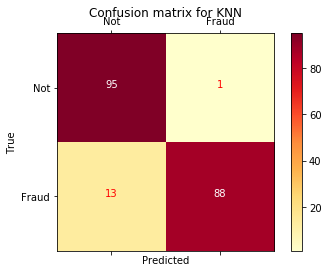

Random Forest
Accuracy is: 0.929
precision is: 0.989
recall is: 0.871


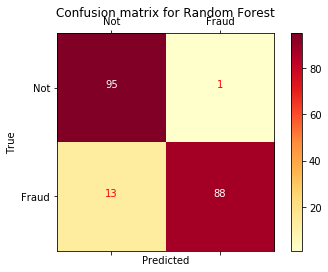

Logistic Regression
Accuracy is: 0.944
precision is: 0.979
recall is: 0.911


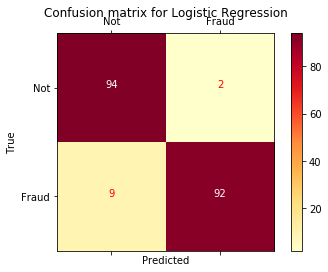

In [96]:
confusion_matrices = [
    ("KNN", KNN_cm),
    ("Random Forest", RF_cm),
    ('Logistic Regression', LR_cm)
]

draw_confusion_matrices(confusion_matrices)

# Model Evaluation - ROC & AUC

### Random Forest

In [44]:
from sklearn.metrics import roc_curve
from sklearn import metrics

# Use predict_proba to get the probability results of Random Forest
y_pred_rf = best_RF_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

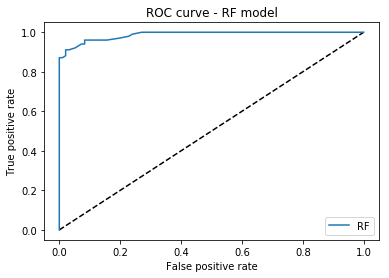

In [45]:
# ROC curve of Random Forest result
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RF model')
plt.legend(loc='best')
plt.show()

In [46]:
from sklearn import metrics

# AUC score
metrics.auc(fpr_rf,tpr_rf)

0.9872112211221122

### Logistic Regression

In [47]:
# Use predict_proba to get the probability results of Logistic Regression
y_pred_lr = best_LR_model.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lr)

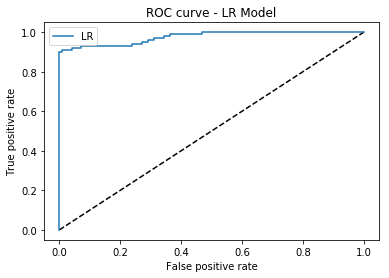

In [48]:
# ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - LR Model')
plt.legend(loc='best')
plt.show()

In [49]:
# AUC score
metrics.auc(fpr_lr,tpr_lr)

0.9760726072607261

### KNN

In [50]:
# Use predict_proba to get the probability results of KNN
y_pred_knn = best_KNN_model.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_knn)

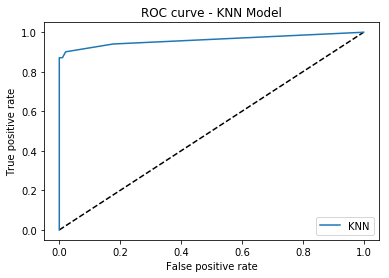

In [51]:
# ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_knn, tpr_knn, label='KNN')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - KNN Model')
plt.legend(loc='best')
plt.show()

In [52]:
# AUC score
metrics.auc(fpr_lr,tpr_lr)

0.9760726072607261

### Feature Importance Discussion

In [53]:
# check feature importance of random forest for feature selection
forest = RandomForestClassifier()
forest.fit(X, y)

importances = forest.feature_importances_

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for k,v in sorted(zip(map(lambda x: round(x, 4), importances), X.columns), reverse=True):
    print (v + ": " + str(k))

Feature importance ranking by Random Forest Model:
V12: 0.2135
V14: 0.1966
V17: 0.1542
V4: 0.1268
V11: 0.0801
V2: 0.0556
V10: 0.0236
V19: 0.0203
V3: 0.0179
V1: 0.0175
Amount: 0.0175
V7: 0.0155
Time: 0.0141
V6: 0.0135
V9: 0.0113
V5: 0.0083
V16: 0.0071
V18: 0.0065


# Using the oversampling data to make the predict

In [55]:
over_sampling_df = pd.read_csv('creditcard.csv', encoding='latin-1') # loading the data

In [57]:
over_sampling = over_sampling_df.drop(droplist, axis = 1) # 删除droplist中的列

In [58]:
col = ['Amount','Time']

sc =StandardScaler() # Initialize the scaler
over_sampling[col] =sc.fit_transform(over_sampling[col])#standardize the data

In [73]:
# separate X and Y


X = over_sampling.iloc[:, :-1]
y = over_sampling["Class"]


In [75]:
X.shape

(284807, 18)

In [76]:
sm = SMOTE(random_state=42)    # deal with over-sampling
X, y = sm.fit_sample(X, y)

In [84]:
# Prediction of test data
best_RF_model.predict(X)
# Accuracy of test data
best_RF_model.score(X, y)

0.9492710549918224

In [85]:
# Prediction of test data
best_LR_model.predict(X)
# Accuracy of test data
best_LR_model.score(X, y)

0.9380581397393736

In [86]:
# Prediction of test data
best_KNN_model.predict(X)
# Accuracy of test data
best_KNN_model.score(X, y)

0.9464045161176864

In [87]:
model_names = ['Logistic Regression','KNN','Random Forest']
model_list = [best_LR_model, best_KNN_model, best_RF_model]
count = 0

for classifier in model_list:
    cv_score = model_selection.cross_val_score(classifier, X, y, cv=5)
    # cprint(cv_score)
    print('Model accuracy of %s is: %.3f'%(model_names[count],cv_score.mean()))
    count += 1

Model accuracy of Logistic Regression is: 0.930
Model accuracy of KNN is: 0.997
Model accuracy of Random Forest is: 0.821


In [88]:
scores_nn = model_nn.evaluate(X, y)
print('nn accuracy = ', scores_nn[1])

568630/568630 [==============================] - 5s 9us/step
nn accuracy =  0.9595519054563466
